In [1]:
import numpy as np  # Importa a biblioteca numpy para cálculos matemáticos
import pandas as pd # Importa a biblioteca pandas para manipulação de dados
import matplotlib.pyplot as plt # Importa a biblioteca matplotlib para plotar gráficos
from sklearn.linear_model import LinearRegression # Importa o modelo de regressão linear
from sklearn.pipeline import make_pipeline # Importa a função make_pipeline para criar um pipeline de transformação de dados
from sklearn.preprocessing import PolynomialFeatures # Importa a função PolynomialFeatures para criar features polinomiais a partir dos dados
import statsmodels.api as sm # Importa a biblioteca statsmodels para análise estatística
from warnings import filterwarnings # Importa a função filterwarnings para filtrar avisos
filterwarnings('ignore') # Filtra os avisos

In [2]:
# Criação da tabela com os valores extraídos da imagem
data = {
    "Período": range(1, 22),
    "Equipamento A": [
        7490, 7926, 9021, 8575, 7350, 6119, 6767, 7896, 7823, 6998,
        5287, 5793, 7000, 6711, 5578, 4484, 4725, 5215, 5250, 4550, 3500
    ],
    "Equipamento B": [
        3410, 2970, 3575, 3927, 3630, 4070, 3410, 3135, 3564, 3554,
        3176, 3960, 3598, 3380, 2860, 3273, 3516, 4206, 3794, 3230, 3516
    ]
}

# Convertendo para dataframe
df = pd.DataFrame(data)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Demanda de Manutenção", dataframe=df)


In [3]:
# Calculando média móvel de 3 períodos
df['Mm3 A'] = df["Equipamento A"].rolling(window=3).mean()
df['erro3 A'] = df["Equipamento A"] - df['Mm3 A']
df['Mm3 B'] = df["Equipamento B"].rolling(window=3).mean()
df['erro3 B'] = df["Equipamento B"] - df['Mm3 B']
# Calculando média móvel de 5 períodos
df['Mm5 A'] = df["Equipamento A"].rolling(window=5).mean()
df['erro5 A'] = df["Equipamento A"] - df['Mm5 A']
df['Mm5 B'] = df["Equipamento B"].rolling(window=5).mean()
df['erro5 B'] = df["Equipamento B"] - df['Mm5 B']
df.round(0)

,Período,Equipamento A,Equipamento B,Mm3 A,erro3 A,Mm3 B,erro3 B,Mm5 A,erro5 A,Mm5 B,erro5 B
0,1,7490,3410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,7926,2970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,9021,3575,8146.0,875.0,3318.0,257.0,NaN,NaN,NaN,NaN
3,4,8575,3927,8507.0,68.0,3491.0,436.0,NaN,NaN,NaN,NaN
4,5,7350,3630,8315.0,-965.0,3711.0,-81.0,8072.0,-722.0,3502.0,128.0
5,6,6119,4070,7348.0,-1229.0,3876.0,194.0,7798.0,-1679.0,3634.0,436.0
6,7,6767,3410,6745.0,22.0,3703.0,-293.0,7566.0,-799.0,3722.0,-312.0
7,8,7896,3135,6927.0,969.0,3538.0,-403.0,7341.0,555.0,3634.0,-499.0
8,9,7823,3564,7495.0,328.0,3370.0,194.0,7191.0,632.0,3562.0,2.0
9,10,6998,3554,7572.0,-574.0,3418.0,136.0,7121.0,-123.0,3547.0,7.0


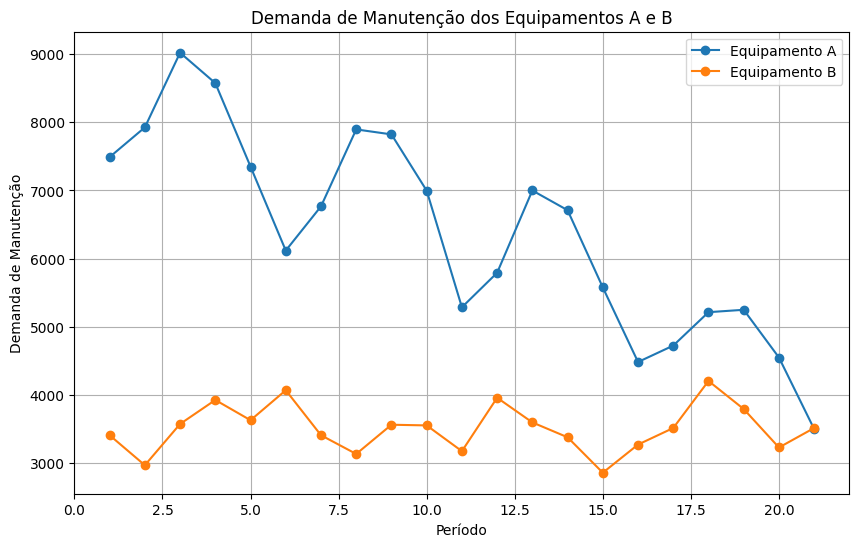

In [4]:
# Plotagem do gráfico
plt.figure(figsize=(10, 6))
plt.plot(df["Período"], df["Equipamento A"], label="Equipamento A", marker="o")
plt.plot(df["Período"], df["Equipamento B"], label="Equipamento B", marker="o")
plt.xlabel("Período")
plt.ylabel("Demanda de Manutenção")
plt.title("Demanda de Manutenção dos Equipamentos A e B")
plt.legend()
plt.grid()
plt.savefig('Demanda de Manutenção dos Equipamentos A e B.png')
plt.show()


In [5]:
# regressão linear simples de Equipamento A
X = df["Período"].values.reshape(-1,1)
Y = df["Equipamento A"].values

x_SEQ = np.linspace(X.min(),X.max(),300).reshape(-1,1)

value = 1 # grau do polinômio

polynomial_regressionA = make_pipeline(PolynomialFeatures(value),LinearRegression())
polynomial_regressionA.fit(X,Y)

P = df['Período'].values.reshape(-1,1)
Q = df['Equipamento B'].values

polynomial_regressionB = make_pipeline(PolynomialFeatures(value),LinearRegression())
polynomial_regressionB.fit(P,Q)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [13]:
# previsão do período 21
predict21 = pd.DataFrame({"Período": [22], "Equipamento A": polynomial_regressionA.predict([[21]]), "Equipamento B": polynomial_regressionB.predict([[21]])})
df = pd.concat([df, predict21], ignore_index=True)
df


,Período,Equipamento A,Equipamento B,Mm3 A,erro3 A,Mm3 B,erro3 B,Mm5 A,erro5 A,Mm5 B,erro5 B
0,1,7490.000000,3410.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,7926.000000,2970.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,9021.000000,3575.000000,8145.666667,875.333333,3318.333333,256.666667,NaN,NaN,NaN,NaN
3,4,8575.000000,3927.000000,8507.333333,67.666667,3490.666667,436.333333,NaN,NaN,NaN,NaN
4,5,7350.000000,3630.000000,8315.333333,-965.333333,3710.666667,-80.666667,8072.4,-722.4,3502.4,127.6
5,6,6119.000000,4070.000000,7348.000000,-1229.000000,3875.666667,194.333333,7798.2,-1679.2,3634.4,435.6
6,7,6767.000000,3410.000000,6745.333333,21.666667,3703.333333,-293.333333,7566.4,-799.4,3722.4,-312.4
7,8,7896.000000,3135.000000,6927.333333,968.666667,3538.333333,-403.333333,7341.4,554.6,3634.4,-499.4
8,9,7823.000000,3564.000000,7495.333333,327.666667,3369.666667,194.333333,7191.0,632.0,3561.8,2.2
9,10,6998.000000,3554.000000,7572.333333,-574.333333,3417.666667,136.333333,7120.6,-122.6,3546.6,7.4


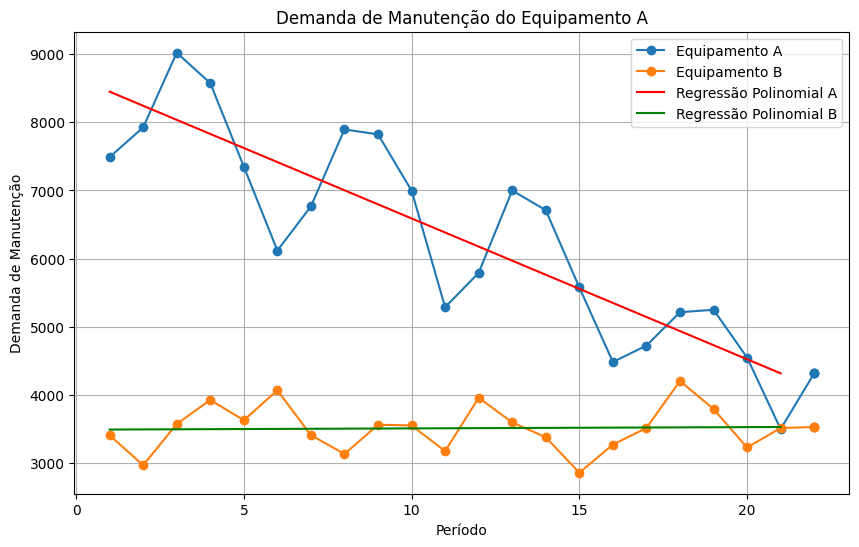

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df["Período"], df["Equipamento A"], label="Equipamento A", marker="o")
plt.plot(df["Período"], df["Equipamento B"], label="Equipamento B", marker="o")
plt.plot(x_SEQ,polynomial_regressionA.predict(x_SEQ),color='red', label="Regressão Polinomial A")
plt.plot(x_SEQ,polynomial_regressionB.predict(x_SEQ),color='green', label="Regressão Polinomial B")
plt.xlabel("Período")
plt.ylabel("Demanda de Manutenção")
plt.title("Demanda de Manutenção do Equipamento A")
plt.legend()
plt.grid()
plt.savefig('Demanda de Manutenção e regressão dos ativos.png')
plt.show()


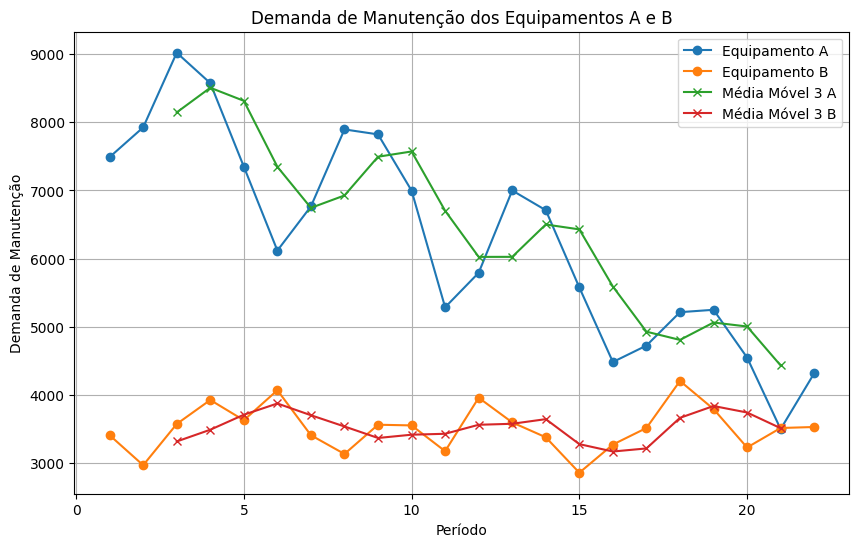

In [8]:
# Plotagem do gráfico
plt.figure(figsize=(10, 6))
plt.plot(df["Período"], df["Equipamento A"], label="Equipamento A", marker="o")
plt.plot(df["Período"], df["Equipamento B"], label="Equipamento B", marker="o")
plt.plot(df["Período"], df["Mm3 A"], label="Média Móvel 3 A", marker="x")
plt.plot(df["Período"], df["Mm3 B"], label="Média Móvel 3 B", marker="x")
plt.xlabel("Período")
plt.ylabel("Demanda de Manutenção")
plt.title("Demanda de Manutenção dos Equipamentos A e B")
plt.legend()
plt.grid()
plt.savefig('Demanda de Manutenção e média móvel dos ativos.png')
plt.show()



In [9]:
# análise do equipamento B
dfB = df[['Período','Equipamento B', 'Mm3 B', 'erro3 B']]
dfB['Reg Linear'] = polynomial_regressionB.predict(dfB[['Período']])
alpha1 = 0.05
dfB['MME B a=0.05'] = pd.Series(dfB['Mm3 B'] + alpha1*(dfB['Equipamento B'] - dfB['Mm3 B']))
dfB = dfB.round(0)
dfB

,Período,Equipamento B,Mm3 B,erro3 B,Reg Linear,MME B a=0.05
0,1,3410.0,NaN,NaN,3493.0,NaN
1,2,2970.0,NaN,NaN,3495.0,NaN
2,3,3575.0,3318.0,257.0,3497.0,3331.0
3,4,3927.0,3491.0,436.0,3499.0,3512.0
4,5,3630.0,3711.0,-81.0,3501.0,3707.0
5,6,4070.0,3876.0,194.0,3503.0,3885.0
6,7,3410.0,3703.0,-293.0,3505.0,3689.0
7,8,3135.0,3538.0,-403.0,3506.0,3518.0
8,9,3564.0,3370.0,194.0,3508.0,3379.0
9,10,3554.0,3418.0,136.0,3510.0,3424.0


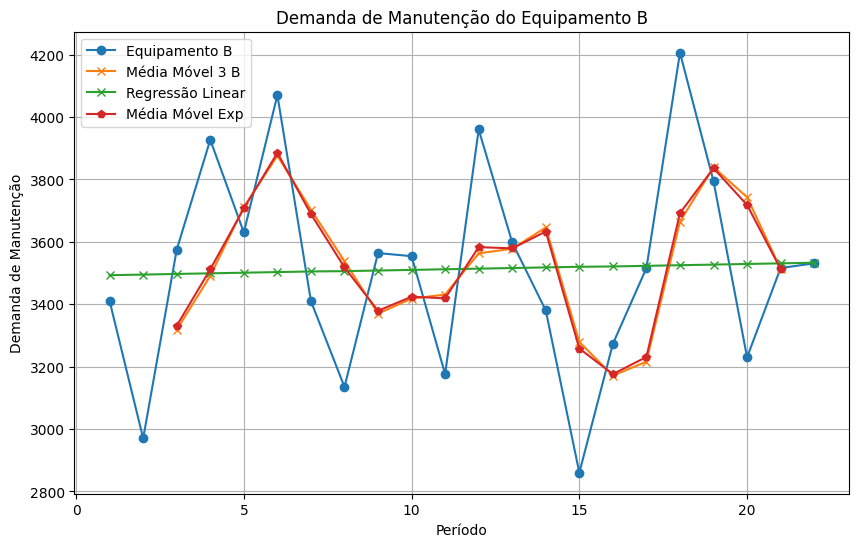

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(dfB["Período"], dfB["Equipamento B"], label="Equipamento B", marker="o")
plt.plot(dfB["Período"], dfB["Mm3 B"], label="Média Móvel 3 B", marker="x")
plt.plot(dfB["Período"], dfB["Reg Linear"], label="Regressão Linear", marker="x")
plt.plot(dfB['Período'], dfB['MME B a=0.05'], label="Média Móvel Exp", marker="p")
plt.xlabel("Período")
plt.ylabel("Demanda de Manutenção")
plt.title("Demanda de Manutenção do Equipamento B")
plt.legend()
plt.grid()
plt.show()
plt.savefig('Demanda de Manutenção e média móvel dos ativos B.png')

In [11]:
writer = pd.ExcelWriter('prova2.xlsx')

df.to_excel(writer, sheet_name='mapeamento das médias móveis', index=False)
dfB.to_excel(writer, sheet_name='Análise ativo B', index=False)

writer.close()




ModuleNotFoundError: No module named 'openpyxl'